# Premiers algorithmes : régression linéaire, perceptron 
L'objectif de ce tp est de comprendre en profondeur l'algorithme de la descente du gradient, algorithme d'optimisation de fonction convexe. La première partie de ce tp est dédiée à la prise en main de python et à l'étude de cet algorithme dans le cas de fonctions simples. La deuxième partie est consacrée à l'application de cet algorithme au cas de la regression linéaire. La troisième partie étudie son application dans le cas de l'algorithme du perceptron, algorithme de classification. Enfin, la quatrième partie étudie quelques extensions, de la ridge regression à une introduction aux svms. 

In [1]:
from tools import *
%matplotlib inline

## Descente de gradient

### Préambule
Télécharger le fichier [tools.py](http://). Un fichier python est comme un module : vous pouvez charger tout ce que contient un fichier en exécutant `from tools import *` . De manière générale, nous aurons besoin des modules `numpy` (pour les maths), `matplotlib.pyplot` (pour les courbes et graphiques) et `sklearn` (pour l'apprentissage). Vous pouvez donner un racourci à un module (exemple classique : `import numpy as np`, puis `np.fonction` pour appeller une fonction du module `numpy`).  

###Algorithme
L'algorithme de descente du gradient est un algorithme itératif très utilisé pour optimiser une fonction continue dérivable. Son principe est d'approché pas à pas une solution (localement) optimale, en "suivant" la direction du gradient. A partir d'un point tiré aléatoirement $x_0$, le point est mis à jour itérativement en se déplaçant en direction inverse du gradient de la fonction $f$ :

1. $x_0=random()$
2. $x_{i+1} \leftarrow x_i -\epsilon*\nabla f(x_i)$
3. boucler sur 2.

La classe `OptimFunc` permet d'enregistrer les renseignements nécessaires à l'optimisation d'une fonction $f$ : la fonction elle-même, son gradient, et la dimension de l'entrée. Un exemple est donné ci-dessous dans le cas de la fonction $f(x)$.

In [2]:
class OptimFunc:
    def __init__(self,f=None,grad_f=None,dim=2):
        self.f=f
        self.grad_f=grad_f
        self.dim=dim
    def init(self,low=-1,high=1):
        return random.random(self.dim)*(high-low)+low

def lin_f(x): return x
def lin_grad(x): return 1
lin_optim=OptimFunc(lin_f,lin_grad,1)
#Utiliser la fonction :
lin_optim.f(3)
#le gradient :
lin_optim.grad_f(1)

1

#### Coder les fonctions suivantes et les instances de `OptimFunc` `xcosx` et `rosen` qui y correspondent :

- $xcosx(x)=x cos(x)$ en dimension 1
- $rosen(x_1,x_2)=100*(x_2-x_1^2)^2+(1-x_1)^2$  en dimension 2
 
#### Utiliser le code suivant (en le comprenant) pour afficher les fonctions précédentes.

In [3]:
#definition des fonctions
def xcos(x):
	return x*np.cos(x)
def rosen(x):
	return 100*(x[1]-x[0]**2)**2+(1-x[0]**2)
#definition des gradients
def grad_rosen(x):
	return np.array([-400*x[0]*(x[1]-x[0]**2)-2*x[0],200*(x[1]-x[0]**2)])
def grad_xcos(x):
	return np.cos(x)+x*np.sin(x)

#definitions des fonctions optimisees
rosen_optim=OptimFunc(rosen,grad_rosen,2)
xcos_optim=OptimFunc(xcos,grad_xcos,1)

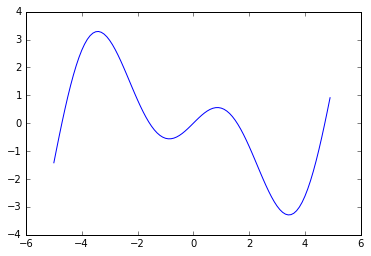

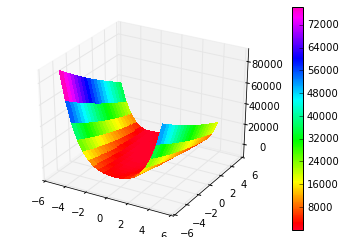

In [4]:
xrange=np.arange(-5,5,0.1)
plt.plot(xrange,xcos_optim.f(xrange))
plt.show()

### affichage 3D
grid,xvec,yvec=make_grid(xmin=-5,xmax=5,ymin=-5,ymax=5)
# z=rosen_optim.f(grid).reshape(xvec.shape)
z=np.apply_along_axis(rosen_optim.f,1,grid).reshape(xvec.shape) #application a tous les axes un par un 
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xvec, yvec, z, rstride=1, cstride=1, cmap=cm.gist_rainbow,linewidth=0, antialiased=False)
fig.colorbar(surf)
plt.show()



#### Utiliser la classe suivante pour optimiser les fonctions précédentes.
Cette classe implémente une descente de gradient. Quelle est le critère d'arrêt ? en voyez-vous d'autres ? A quoi correspond les variables `log_w`, `log_f`, `log_grad` ?

-> Le critère d'arrêt est le nombre maximum d'itérations entré lors de la création d'une descente de gradient (par défaut de 5000 itérations).
Les variables `log_w`, `log_f` et `log_grad` permettent d'enregistrer les valeurs du paramètre d'apprentissage et garder un historique du paramètre d'apprentissage, de la fonction et du gradient de la fonction au cours de l'algorithme itératif (`log` au sens du `log` de la console, ie l'enregistrement des valeurs). Cet enregistrement permet ensuite de tracer les evolutions de ces 3 paramètres en fonction des itérations (et en faisant varier epsilon également).

In [5]:
class GradientDescent:
    def __init__(self,optim_f,eps=1e-4,max_iter=15000):
        self.optim_f=optim_f
        self.eps=eps
        self.max_iter=max_iter
    def reset(self):
        self.i=0
        self.w = self.optim_f.init()
        self.log_w=np.array(self.w)
        self.log_f=np.array(self.optim_f.f(self.w))
        self.log_grad=np.array(self.optim_f.grad_f(self.w))
    def optimize(self,reset=True):
        if reset:
            self.reset()
        while not self.stop():
            self.w = self.w - self.get_eps()*self.optim_f.grad_f(self.w)
            self.log_w=np.vstack((self.log_w,self.w))
            self.log_f=np.vstack((self.log_f,self.optim_f.f(self.w)))
            self.log_grad=np.vstack((self.log_grad,self.optim_f.grad_f(self.w)))
            #if self.i%100==0:
                #print (self.i," iterations ",self.log_f[self.i]),self.score(self.data,self.y),self.w.dot(self.w)
            self.i+=1
    def stop(self):
        return (self.i>2) and (self.max_iter and (self.i>self.max_iter))
    def get_eps(self):
        return self.eps




Tracez les courbes de la valeur de la fonction en fonction du nombre d'itérations en faisant varier la variable `epsilon`. Que remarquez-vous ? Tracer la trajectoire d'optimisation à l'aide des fonctions d'affichage précédentes.
Trouvez-vous toujours la même solution en fonction des exécutions ? Si non, de quoi dépend-elle ? Est-ce normal ?

#### Valeur de la fonction en fonction du nb d'iterations pour différents Epsilon


#### Fonction xcos

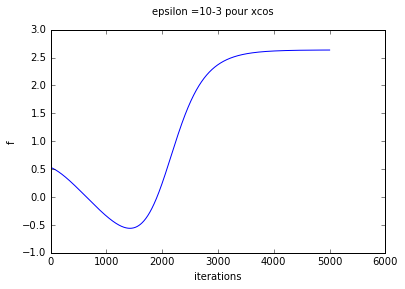

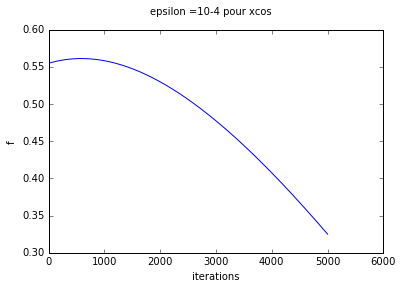

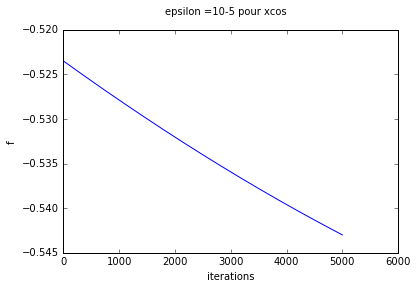

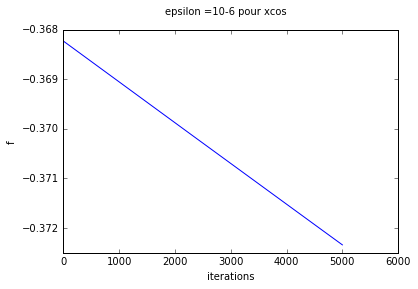

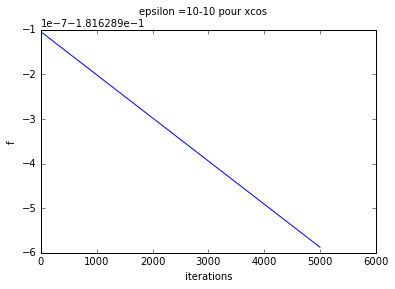

In [44]:
xcos_gd=GradientDescent(xcos_optim,1e-3,5000)
xcos_gd.optimize()
iterr=np.arange(0,xcos_gd.i+1,1)
iterr=iterr[:,np.newaxis]
plt.figure().suptitle('epsilon =10-3 pour xcos')
plt.plot(iterr,xcos_gd.log_f)
plt.ylabel('f')
plt.xlabel('iterations')
plt.show()

xcos_gd=GradientDescent(xcos_optim,1e-4,5000)
xcos_gd.optimize()
iterr=np.arange(0,xcos_gd.i+1,1)
iterr=iterr[:,np.newaxis]
plt.figure().suptitle('epsilon =10-4 pour xcos')
plt.plot(iterr,xcos_gd.log_f)
plt.ylabel('f')
plt.xlabel('iterations')
plt.show()

xcos_gd=GradientDescent(xcos_optim,1e-5,5000)
xcos_gd.optimize()
iterr=np.arange(0,xcos_gd.i+1,1)
iterr=iterr[:,np.newaxis]
plt.figure().suptitle('epsilon =10-5 pour xcos')
plt.plot(iterr,xcos_gd.log_f)
plt.ylabel('f')
plt.xlabel('iterations')
plt.show()

xcos_gd=GradientDescent(xcos_optim,1e-6,5000)
xcos_gd.optimize()
iterr=np.arange(0,xcos_gd.i+1,1)
iterr=iterr[:,np.newaxis]
plt.figure().suptitle('epsilon =10-6 pour xcos')
plt.plot(iterr,xcos_gd.log_f)
plt.ylabel('f')
plt.xlabel('iterations')
plt.show()

xcos_gd=GradientDescent(xcos_optim,1e-10,5000)
xcos_gd.optimize()
iterr=np.arange(0,xcos_gd.i+1,1)
iterr=iterr[:,np.newaxis]
plt.figure().suptitle('epsilon =10-10 pour xcos')
plt.plot(iterr,xcos_gd.log_f)
plt.ylabel('f')
plt.xlabel('iterations')
plt.show()

#### Fonction rosen

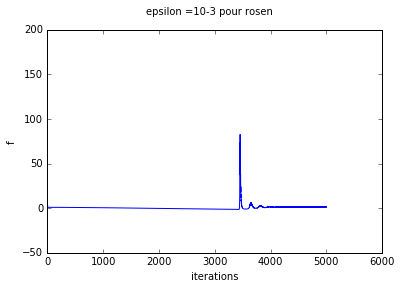

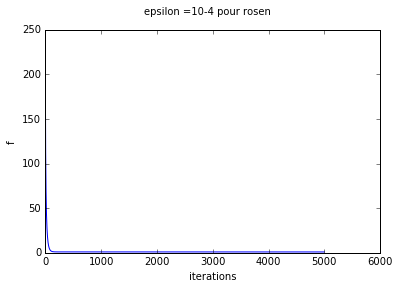

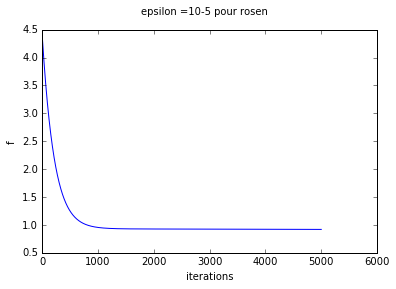

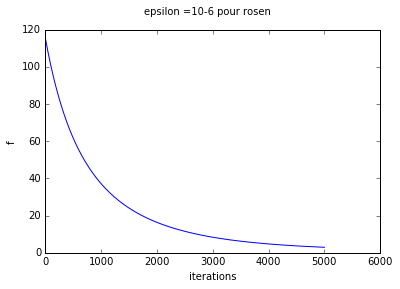

In [45]:
rosen_gd=GradientDescent(rosen_optim,1e-3,5000)
rosen_gd.optimize()
iterr=np.arange(0,xcos_gd.i+1,1)
iterr=iterr[:,np.newaxis]
plt.figure().suptitle('epsilon =10-3 pour rosen')
plt.plot(iterr,rosen_gd.log_f)
plt.ylabel('f')
plt.xlabel('iterations')
plt.show()

rosen_gd=GradientDescent(rosen_optim,1e-4,5000)
rosen_gd.optimize()
iterr=np.arange(0,xcos_gd.i+1,1)
iterr=iterr[:,np.newaxis]
plt.figure().suptitle('epsilon =10-4 pour rosen')
plt.plot(iterr,rosen_gd.log_f)
plt.ylabel('f')
plt.xlabel('iterations')
plt.show()

rosen_gd=GradientDescent(rosen_optim,1e-5,5000)
rosen_gd.optimize()
iterr=np.arange(0,xcos_gd.i+1,1)
iterr=iterr[:,np.newaxis]
plt.figure().suptitle('epsilon =10-5 pour rosen')
plt.plot(iterr,rosen_gd.log_f)
plt.ylabel('f')
plt.xlabel('iterations')
plt.show()

rosen_gd=GradientDescent(rosen_optim,1e-6,5000)
rosen_gd.optimize()
iterr=np.arange(0,xcos_gd.i+1,1)
iterr=iterr[:,np.newaxis]
plt.figure().suptitle('epsilon =10-6 pour rosen')
plt.plot(iterr,rosen_gd.log_f)
plt.ylabel('f')
plt.xlabel('iterations')
plt.show()

-> On constate pour la fonction rosen qu'un taux d'apprentisage epsilon trop grand (10-3) la descente de gradient ne converge pas, il y a même divergence pour un nombre specifique d'itérations. On constate aussi que pour epsilon=10-4 le gradient converge assez vite. Si on diminute epsilon, il faut plus d'iterations pour qu'il y ait convergence. Epsilon=10-4 est donc un bon taux d'apprentissage pour la fonction rosen.
On constate pour la fonction xcos que pour epsilon=10^3 et epsilon=10-4, la descente de gradient diverge. Au contraire, pour des valeurs invférieurs la descente de gradient converge mais demande un grand nombre d'iterations. 
On ne trouve pas toujours la meme solution en fonction des executions, en effet, on initialise aléatoirement à chaque fois. 

## Régression linéaire
Etant donné un ensemble de $n$ points en $d$ dimensions et leurs valeurs cibles  $\{(x^i,y^i)\}\in X\times Y \subset \mathbb{R}^d\times \mathbb{R}$, le problème de la régression linéaire est de trouver une fonction linéaire $f : X \to Y$ qui minimise l'erreur quadratique $\sum_i \frac{1}{2n}(f(x^i)-y^i)^2$. La fonction $f$ étant linéaire, on peut la paramétriser par $\mathbf{w} \in \mathbb{R}^{d+1}$ : $f_\mathbf{w}(x)=\sum_{i=1}^d w_i x_i+w_0$. L'objectif est alors de trouver $\mathbf{w}$ qui minimise l'erreur quadratique. En cours vous avez vu la résolution exacte. Dans ce qui suit, nous allons étudier la résolution de ce problème à l'aide de la descente du gradient.

- Faites une fonction `gen_1d(n,eps)` qui engendre $n$ données 1D selon la droite $f(x)=2*x+1$ que vous bruiterez avec un bruit gaussien de variance `eps` (avec un code de deux lignes, en utilisant les fonctions `np.random.random()` et `np.random.normal()`, étudier l'aide avec la fonction `help()`). Cette fonction doit vous rendre les coordonnées $x$ des points ainsi que leurs valeurs.
- Quel est le calcul matriciel permettant de calculer $f_\mathbf{w}$ ? Et son gradient ?
- Quelle est la fonction (et son gradient) à optimiser dans ce cas ? Comment adapter la descente de gradient à ce problème ?
- A quoi correspond $w_0$ ? Comment l'intégrer en pratique ?
- Utiliser une classe héritée (voir squelette ci-dessous) pour coder la régression linéaire.
- Tester votre fonction sur les données engendrées. Tracez la solution.

In [6]:
def gen_1d(n,eps):
    x=np.random.random(n)
    L=2*x+1+np.random.normal(0,eps,n)
    return np.transpose(np.vstack((x,L)))
data=gen_1d(100,0.1)

-> Le calcul matriciel pour $ f_w$ est $f_w=w^{ T}*x+w_0$. La fonction à utiliser pour ce calculer est `f_w=np.dot(w,x)`.
La fonction à optimiser est $\sum_i \frac{1}{2n}(f_w(x^i)-y^i)^2$. La descente de gradient est utilisée ici pour diminuer l'erreur quadratique. On calcule donc $f_w$ et son gradient puis on utilise les méthodes hérités de la classe de descente de gradient `self.optimize()`. 

In [7]:
class Regression(Classifier,GradientDescent,OptimFunc):
    def __init__(self,eps=1e-4,max_iter=20000):
        GradientDescent.__init__(self,self,eps,max_iter)
        self.dim=self.data=self.y=self.n=self.w=None
    def fit(self,data,y):
        self.y=y
        self.n=y.shape[0]
        self.dim=data.size/self.n+1
        self.data=data.reshape((self.n,self.dim-1))
        self.data=np.hstack((np.ones((self.n,1)),self.data))
        self.optimize()
    def f(self,w):
        a=[((self.data[i,:]*w)-self.y[i])**2 for i in range(self.n)]
        return (1/(2*self.n))*sum(a)
    def grad_f(self,w):
        b=[((self.data[i,:]*w)-self.y[i])*self.data[i,:] for i in range(self.n)]
        return (1/self.n)*sum(b)
    def init(self):
        return np.random.random(self.dim)*(np.max(self.data)-np.min(self.data))+np.min(self.data)
    def predict(self,data):
        n=data.size/(self.dim-1)
        return np.hstack((np.ones((n,1)),data.reshape(n,self.dim-1))).dot(self.w)

/Users/alexandreattia/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/alexandreattia/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


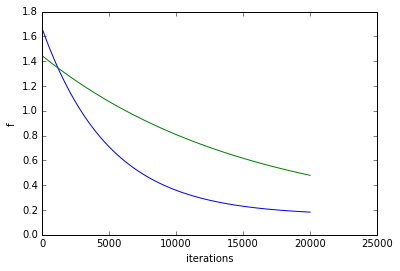

In [8]:
test=Regression()
test.fit(data[:,0],data[:,1])
iterr=np.arange(0,test.i+1,1)
iterr=iterr[:,np.newaxis]
plt.plot(iterr,test.log_f)
plt.ylabel('f')
plt.xlabel('iterations')
plt.show()

-> On constate bien que au cours des itérations l'erreur diminue pour au final tendre vers une valeur limite. La descente de gradient est donc fonctionnelle et l'algorithme apprend au fur et à mesure des itérations ie l'erreur de l'algorithme diminue au fur à mesure des itérations. 

## Premier algorithme de classification: Algorithme du perceptron
Cet algorithme a une longue histoire et est la base des réseaux de neurones. Il peut être vu comme une descente du gradient sur un coût particulier (même si historiquement son inspiration est autre).

On se place dans le cadre de la classification binaire : on considère deux labels, $Y=\{-1/+1\}$, et un ensemble de données $\{(x^i,y^i)\}\in X\times Y \subset \mathbb{R}^d\times Y$. On cherche une fonction $f$ qui permette de **généraliser** l'ensemble des données et de faire le moins d'erreurs sur l'ensemble disponible. Nous nous plaçons toujours dans le cadre linéaire, et la classification est faite  en considérant le signe de $f(x)$ ($>0 \to +1, ~ < 0\to -1$).
Le coût qui nous intéresse est l'erreur $0/1$, qui compte le pourcentage d'erreurs qui est fait sur l'ensemble des données : $l(f(x),y)=\sum_i \mathbf{1}_{f(x^i)\not = y^i}$. 

Cependant ce coût est difficile à optimiser : pourquoi ?  A la place de ce coût, on va chercher à optimiser un coût surrogate, appelé coût *perceptron* (ou plus général *hinge loss*) : $l(f(x),y)=\sum_i max(0,-y^i f(x^i))$.

- Que se passe-t-il pour le coût si une erreur est faite pour $x$ ? si pas d'erreur ? 
- Que représente cette erreur d'un point de vue géométrique ? et $w$ ?
- Pourquoi peut-on adapter l'algorithme précédent à ce contexte pour optimiser $f$ ?
- Calculer le gradient de la fonction de coût et adapter la classe précédente pour la classification (classe `Perceptron`).
- Utiliser la fonction de génération de données `gen_arti` pour engendrer des jeux de données (3 jeux de données disponibles). Tracer les frontières de décisions (`plot_frontiere(data,perceptron.predict)`). Quelles sont les limites de l'algorithme du Perceptron ?

## Extensions : linéaire... vraiment ?

Nous avons pour l'instant considérer que des fonctions linéaires. 

- Pourquoi à votre avis est-il utile de limiter la famille de fonctions considérée ? Quelle est la limite ?
- Une façon d'augmenter l'expressivité des fonctions est de transformer l'espace d'entrée par des projections. Soit $x \in \mathbb{R}^2$, et $\phi(x)=(1,x_1,x_2,x_1x_2,x_1^2,x_2^2)$ la projection polynomiale d'ordre 2. Quelle est la forme des frontières de décision de la fonction de décision $f^\phi_\mathbf{w}(x)=f_\mathbf{w}(\phi(x))$ ? 
- Que doit-on changer pour adapter la descente du gradient, que ce soit dans le cas de la régression linéaire ou du perceptron ? Peut-on généraliser à des degrés supérieurs ?  
- Soit $B=\{x_1,x_2,\cdots,x_B\}$ un ensemble de points de même dimension que l'entrée, et $\phi_B(x)=(k(x,x_1),k(x,x_2),\cdots,k(x,x_B))$ la projection gaussienne sur $B$ de $x$, $k(x,x')=Ke^{\frac{\|x-x'\|^2}{\sigma^2}}$. Que doit-on changer pour adapter l'algorithme du perceptron ? 
- Que veut-dire un poids positif devant une composante  de cette projection ? un poids négatif  ? un poids nul ? 
- Que se passe-t-il si beaucoup de poids sont non nuls ? nuls ? Dans quel cas la frontière est la plus complexe ? la moins ?
- En vous inspirant de la notion de ridge regression vu en cours, que proposez vous pour régulariser ?



